# Facial Recognition using Artificial Neural Network
## submitted by - Harsh Srivastava
## Roll - 117CS0755

### importing libraries

In [1]:
import numpy as np
from PIL import Image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

Populating the interactive namespace from numpy and matplotlib


### displaying some sample images from random folders

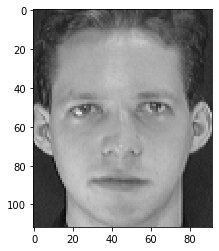

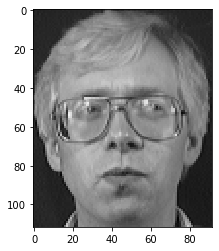

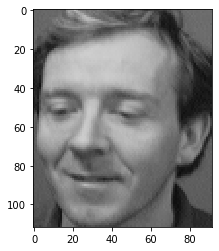

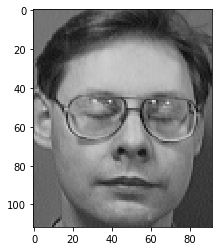

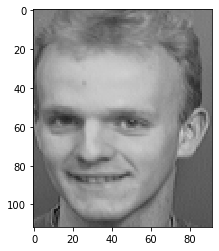

In [2]:
base_path = 'facial_data/Datasets/att_faces_combined/'
    
img=cv2.imread(base_path + 's1/1.pgm')
imgplot = plt.imshow(img)
plt.show()
    
img=cv2.imread(base_path + 's2/3.pgm')
imgplot = plt.imshow(img)
plt.show()
    
img=cv2.imread(base_path + 's3/5.pgm')
imgplot = plt.imshow(img)
plt.show()
    
img=cv2.imread(base_path + 's4/9.pgm')
imgplot = plt.imshow(img)
plt.show()

img=cv2.imread(base_path + 's5/6.pgm')
imgplot = plt.imshow(img)
plt.show()

leny, lenx, z = img.shape

### creating feature vector for images from training

In [3]:
def create_feature_vec(num_train) :  

    feature_vector = []
    for i in range(1, 41) : # for each folder
        folder_path = base_path + 's' + str(i) + '/'
        for j in range(1, num_train + 1) : # for each image inside the folder si
            img_path = folder_path + str(j) + '.pgm'
            im = Image.open(img_path)
            pix = im.load()

            img_row = []
            for x in range(lenx) :
                for y in range(leny) :
                    img_row.append(pix[x, y])

            feature_vector.append(img_row)

    feature_vector = np.array(feature_vector)
    feature_vector_T = np.transpose(feature_vector)
    print("feature vector = ", feature_vector)
    print("shape of feature vector = ", feature_vector.shape)
    print("\n")

    return feature_vector

### mean vector

In [4]:
def create_mean_vec(feature_vector) :

    mean = np.mean(feature_vector, axis = 0)
    #mean_T = np.transpose(mean)
    print("mean vector = ", mean)
    print("shape of mean vector = ", mean.shape)
    print("\n")
    return mean

### deviation matrix

In [5]:
def create_dev_mat(feature_vector, mean) :

    dev_mat = feature_vector - mean
    #dev_mat_T = np.transpose(dev_mat)
    print("deviation matrix = ", dev_mat)
    print("shape of deviation matrix = ", dev_mat.shape)
    print("\n")
    return dev_mat

### covariance matrix

In [6]:
def create_cov_matrix(dev_mat) :

    cov_mat = np.dot(dev_mat, dev_mat.T)
    print("covariance matrix = ", cov_mat)
    print("shape of covariance matrix = ", cov_mat.shape)
    print("\n")
    return cov_mat

### eigenvalues and eigenvectors

In [7]:
def create_eig_val_vec(cov_mat) :

    eigen_val, eigen_vec = np.linalg.eig(cov_mat)

    eigen_val_s = np.sort(eigen_val)
    eigen_vec_s = eigen_vec[:, eigen_val.argsort()]
    eigen_vec_s = np.fliplr(eigen_vec_s)

    eigen_vec = eigen_vec_s
    eigen_val = eigen_val_s
    
    print("shape of eigen values vector -->",eigen_val.shape)
    print("shape of eigen vector matrix -->",eigen_vec.shape)
    print("\n")

    return eigen_val, eigen_vec

In [8]:
def select_k_eigenvectors(eigen_vec, k) :
    dec_feature_vec = eigen_vec[:, :k]
    print("feature vector from pca = ", dec_feature_vec)
    print("shape of selected feature vec = ", dec_feature_vec.shape)
    return dec_feature_vec

In [9]:
def create_eigen_faces(dec_feature_vec, dev_mat) :
    eig_face = np.dot(np.transpose(dec_feature_vec), dev_mat)
    print("feature vector from pca = ", eig_face)
    print("shape of eigen faces = ", eig_face.shape)
    return eig_face

In [10]:
def signature_each_face(eig_face, dev_mat) :
    sig_face = np.dot(eig_face, dev_mat.T)
    print("signature of each face = ", sig_face)
    print("dimension of signature = ", sig_face.shape)
    return sig_face

### create the test matrix

In [11]:
def create_test_matrix(num_train) :
    
    test_mat = []
    for i in range(1, 41) : # for each folder
        folder_path = base_path + 's' + str(i) + '/'
        for j in range(num_train + 1, 11) :

            img_path = folder_path + str(j) + '.pgm'
            im = Image.open(img_path)
            pix = im.load()

            img_row = []
            for x in range(lenx) :
                for y in range(leny) :
                    img_row.append(pix[x, y])

            test_mat.append(img_row)

    test_mat = np.array(test_mat)
    print("test matrix = ", test_mat)
    print("shape of test matrix = ", test_mat.shape)
    print("\n")
    return test_mat  

### mean zero

In [12]:
def create_mean_zero_test(test_mat, mean) :
    
    dev_test_mat = test_mat - mean
    dev_test_mat_T = np.transpose(dev_test_mat)
    print("mean zero test matrix = ", dev_test_mat)
    print("shape of mean zero test matrix = ", dev_test_mat.shape)
    print("\n")
    return dev_test_mat, dev_test_mat_T

### actual values of output

In [13]:
def get_actual_values(num_test) :
    actual_vec = list(range(40))
    actual_vec = np.array([ele for ele in actual_vec for i in range(num_test)])
    print("\nactual expected values\n")
    print(actual_vec)
    print("\nshape of actual output = {}\n".format(actual_vec.shape))
    return actual_vec

### important constants

In [14]:
k = 100 # number of features to be taken from PCA

# number of images in training and test classes
num_train = 6
num_test = 10 - num_train

C = 40 # number of classes/folders

### feature vector

In [15]:
feature_vec = create_feature_vec(num_train)

feature vector =  [[ 48  45  45 ...  46  47  46]
 [ 60  58  68 ...  33  31  34]
 [ 39  44  59 ...  28  27  29]
 ...
 [130 126 123 ...  39  42  40]
 [128 129 126 ...  90  91  84]
 [123 128 126 ...  44  39  42]]
shape of feature vector =  (240, 10304)




### mean vector

In [16]:
mean_vec = create_mean_vec(feature_vec)

mean vector =  [84.82916667 85.1        85.19583333 ... 70.25833333 71.25833333
 72.075     ]
shape of mean vector =  (10304,)




### deviation matrix

In [17]:
dev_mat = create_dev_mat(feature_vec, mean_vec)

deviation matrix =  [[-36.82916667 -40.1        -40.19583333 ... -24.25833333 -24.25833333
  -26.075     ]
 [-24.82916667 -27.1        -17.19583333 ... -37.25833333 -40.25833333
  -38.075     ]
 [-45.82916667 -41.1        -26.19583333 ... -42.25833333 -44.25833333
  -43.075     ]
 ...
 [ 45.17083333  40.9         37.80416667 ... -31.25833333 -29.25833333
  -32.075     ]
 [ 43.17083333  43.9         40.80416667 ...  19.74166667  19.74166667
   11.925     ]
 [ 38.17083333  42.9         40.80416667 ... -26.25833333 -32.25833333
  -30.075     ]]
shape of deviation matrix =  (240, 10304)




### covariance matrix

In [18]:
cov_mat = create_cov_matrix(dev_mat)

covariance matrix =  [[14776305.51154514  6797204.43654514  9795830.08654514 ...
  -2153240.20512153  1931371.12404514   393609.30737847]
 [ 6797204.43654514 26302994.36154512 10811451.01154514 ...
   3175694.71987847  3152996.04904514  3143496.23237847]
 [ 9795830.08654514 10811451.01154514 19794903.66154513 ...
   1564836.36987847  2627156.69904514  2864238.88237847]
 ...
 [-2153240.20512153  3175694.71987847  1564836.36987847 ...
  14144203.0782118   3198586.40737847  4716683.59071181]
 [ 1931371.12404514  3152996.04904514  2627156.69904514 ...
   3198586.40737847 10773686.73654514  3846877.91987847]
 [  393609.30737847  3143496.23237847  2864238.88237847 ...
   4716683.59071181  3846877.91987847 12522650.10321181]]
shape of covariance matrix =  (240, 240)




### eigen values and vectors

In [19]:
eigen_val, eigen_vec = create_eig_val_vec(cov_mat)

shape of eigen values vector --> (240,)
shape of eigen vector matrix --> (240, 240)




### best direction feature vector

In [20]:
dec_feature_vec = select_k_eigenvectors(eigen_vec, k)

feature vector from pca =  [[-0.05220078  0.06025198  0.11299508 ... -0.0687799   0.01194506
  -0.05637735]
 [-0.10916366  0.04859305 -0.01770339 ...  0.03213163 -0.00520682
  -0.0117463 ]
 [-0.0972459   0.03406361  0.05734003 ...  0.08956885 -0.04214041
  -0.04577533]
 ...
 [-0.01782062  0.00835246 -0.13660858 ...  0.03556942  0.04878931
   0.08828651]
 [-0.03549427  0.08124296 -0.05631586 ... -0.02520283 -0.05586283
  -0.00505576]
 [-0.01584045  0.05426855 -0.09935291 ...  0.0216611   0.01186027
  -0.04286296]]
shape of selected feature vec =  (240, 100)


### eigen faces

In [21]:
eig_face = create_eigen_faces(dec_feature_vec, dev_mat)

feature vector from pca =  [[ 109.24881298  110.06293012  105.09609368 ...  121.97388689
   154.91370208  173.58787045]
 [ 319.66587863  319.09110083  318.60225412 ... -165.98788742
  -184.29146388 -210.4925594 ]
 [-333.99259007 -336.75773307 -331.02163158 ... -198.67788484
  -211.04242592 -203.77595656]
 ...
 [  -1.60389172   -0.88877682    9.48666926 ...   -1.88063346
     4.7457353   -10.50677896]
 [  10.53767783    7.03404201    7.79442072 ...  -41.85145503
   -32.42373402  -20.67309395]
 [  -9.63747403   -7.10240544   -9.21884926 ...  -11.44341436
   -18.74311127  -23.02187376]]
shape of eigen faces =  (100, 10304)


### signature of faces, i.e., input for ANN

In [22]:
sig_face = signature_each_face(eig_face, dev_mat)
sig_face = sig_face.T
sig_face.shape

signature of each face =  [[-3.70613883e+07 -7.75037510e+07 -6.90424112e+07 ... -1.26522443e+07
  -2.52001386e+07 -1.12463678e+07]
 [ 2.98700204e+07  2.40900852e+07  1.68870895e+07 ...  4.14074831e+06
   4.02763343e+07  2.69037229e+07]
 [ 3.09856758e+07 -4.85465031e+06  1.57238677e+07 ... -3.74610039e+07
  -1.54430188e+07 -2.72447012e+07]
 ...
 [-2.95348770e+05  1.37976894e+05  3.84618934e+05 ...  1.52739153e+05
  -1.08223841e+05  9.30152645e+04]
 [ 5.00299024e+04 -2.18078922e+04 -1.76498114e+05 ...  2.04345941e+05
  -2.33972180e+05  4.96747725e+04]
 [-2.34929084e+05 -4.89478017e+04 -1.90749558e+05 ...  3.67897165e+05
  -2.10677534e+04 -1.78613507e+05]]
dimension of signature =  (100, 240)


(240, 100)

### creating the test matrix for testing

In [23]:
test_mat = create_test_matrix(num_train)

test matrix =  [[ 41  44  48 ...  35  33  38]
 [ 44  44  41 ...  37  32  37]
 [ 42  41  54 ...  40  39  41]
 ...
 [125 121 122 ...  43  35  40]
 [119 118 120 ...  88  92  85]
 [125 124 121 ...  35  32  34]]
shape of test matrix =  (160, 10304)




### getting deviation test matrix

In [24]:
dev_test_mat, dev_test_mat_T = create_mean_zero_test(test_mat, mean_vec)

mean zero test matrix =  [[-43.82916667 -41.1        -37.19583333 ... -35.25833333 -38.25833333
  -34.075     ]
 [-40.82916667 -41.1        -44.19583333 ... -33.25833333 -39.25833333
  -35.075     ]
 [-42.82916667 -44.1        -31.19583333 ... -30.25833333 -32.25833333
  -31.075     ]
 ...
 [ 40.17083333  35.9         36.80416667 ... -27.25833333 -36.25833333
  -32.075     ]
 [ 34.17083333  32.9         34.80416667 ...  17.74166667  20.74166667
   12.925     ]
 [ 40.17083333  38.9         35.80416667 ... -35.25833333 -39.25833333
  -38.075     ]]
shape of mean zero test matrix =  (160, 10304)




###  getting projected test faces

In [25]:
proj_test_face = np.dot(eig_face, dev_test_mat_T)
print("projected test faces = ", proj_test_face)
print("shape of projected test faces = ", proj_test_face.shape)

projected test faces =  [[-5.98256215e+07 -7.15047769e+07 -6.78985816e+07 ... -1.62445857e+07
  -3.16231048e+07 -9.46633055e+06]
 [ 2.23193326e+07  1.56647039e+07  3.03839360e+07 ...  2.61641392e+07
   3.21538239e+07  1.37333264e+07]
 [ 2.08012017e+07  2.10072244e+07  1.21854095e+07 ... -2.59766146e+07
  -1.10995497e+07 -3.55729820e+07]
 ...
 [ 1.25905486e+05 -1.67515418e+05 -3.80014447e+04 ...  6.24894318e+04
   2.80165078e+05  1.30076625e+05]
 [-2.27721130e+04 -6.18443753e+03  7.82231295e+04 ... -1.81001054e+05
   2.12915401e+05  6.58017511e+04]
 [ 2.61352408e+04  5.91817876e+04 -1.09024087e+05 ... -1.31212724e+05
   5.21493008e+04  1.35486571e+05]]
shape of projected test faces =  (100, 160)


### input and output matrices for training or building the model

In [26]:
X = sig_face
y = list(range(C))
y = np.array([ele for ele in y for i in range(num_train)])
print(X)
print(y)
print(X.shape)
print(y.shape)

[[-3.70613883e+07  2.98700204e+07  3.09856758e+07 ... -2.95348770e+05
   5.00299024e+04 -2.34929084e+05]
 [-7.75037510e+07  2.40900852e+07 -4.85465031e+06 ...  1.37976894e+05
  -2.18078922e+04 -4.89478017e+04]
 [-6.90424112e+07  1.68870895e+07  1.57238677e+07 ...  3.84618934e+05
  -1.76498114e+05 -1.90749558e+05]
 ...
 [-1.26522443e+07  4.14074831e+06 -3.74610039e+07 ...  1.52739153e+05
   2.04345941e+05  3.67897165e+05]
 [-2.52001386e+07  4.02763343e+07 -1.54430188e+07 ... -1.08223841e+05
  -2.33972180e+05 -2.10677534e+04]
 [-1.12463678e+07  2.69037229e+07 -2.72447012e+07 ...  9.30152645e+04
   4.96747725e+04 -1.78613507e+05]]
[ 0  0  0  0  0  0  1  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  3  3
  4  4  4  4  4  4  5  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7
  8  8  8  8  8  8  9  9  9  9  9  9 10 10 10 10 10 10 11 11 11 11 11 11
 12 12 12 12 12 12 13 13 13 13 13 13 14 14 14 14 14 14 15 15 15 15 15 15
 16 16 16 16 16 16 17 17 17 17 17 17 18 18 18 18 18 18 19 19 19 19 19 19

### important constants for ANN model

In [27]:
num_examples = len(X) # training set size
nn_input_dim = k # input layer dimensionality
nn_output_dim = C # output layer dimensionality

epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

### function to calculate total loss

In [28]:
def calculate_loss(model):
    # model parameters
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    
    # Add regulatization term to loss (optio
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

### function to predict (1 to 40)

In [29]:
def predict(model, x):
    # model parameters
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    
    #a1 = np.exp(z1) / 1 + np.exp(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

### building model function

In [30]:
def build_model(nn_hdim, epochs=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, epochs):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        if print_loss and i % 5000 == 0:
            loss = calculate_loss(model)
            print("Loss after iteration %i: %f" %(i, loss))
    
    return model

### accuracy function

In [31]:
def accuracy(prediction, y):
    count = 0
    for i in range((len(y))) :
        if prediction[i] == y[i] :
            count += 1
    return (count / len(y)) * 100

### getting actual output values

In [32]:
actual_vec = get_actual_values(num_test)


actual expected values

[ 0  0  0  0  1  1  1  1  2  2  2  2  3  3  3  3  4  4  4  4  5  5  5  5
  6  6  6  6  7  7  7  7  8  8  8  8  9  9  9  9 10 10 10 10 11 11 11 11
 12 12 12 12 13 13 13 13 14 14 14 14 15 15 15 15 16 16 16 16 17 17 17 17
 18 18 18 18 19 19 19 19 20 20 20 20 21 21 21 21 22 22 22 22 23 23 23 23
 24 24 24 24 25 25 25 25 26 26 26 26 27 27 27 27 28 28 28 28 29 29 29 29
 30 30 30 30 31 31 31 31 32 32 32 32 33 33 33 33 34 34 34 34 35 35 35 35
 36 36 36 36 37 37 37 37 38 38 38 38 39 39 39 39]

shape of actual output = (160,)



### testing for different dimensions of hidden layer

In [33]:
hidden_layer_dimensions = [1, 5, 20, 50, 100, 200]
acc_val = []
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    print("for {} nodes in hidden layer".format(nn_hdim))
    model = build_model(nn_hdim, print_loss=True)
    prediction = predict(model, proj_test_face.T)
    acc = accuracy(prediction, actual_vec)
    acc_val.append(acc)
    print("accuracy = {} \n".format(acc))

for 1 nodes in hidden layer
Loss after iteration 0: 3.948411
Loss after iteration 5000: 3.145295
Loss after iteration 10000: 3.145269
Loss after iteration 15000: 3.145262
accuracy = 5.0 

for 5 nodes in hidden layer
Loss after iteration 0: 3.796798
Loss after iteration 5000: 2.107076
Loss after iteration 10000: 2.106384
Loss after iteration 15000: 2.106234
accuracy = 16.875 

for 20 nodes in hidden layer
Loss after iteration 0: 3.127180
Loss after iteration 5000: 0.181288
Loss after iteration 10000: 0.180655
Loss after iteration 15000: 0.180436
accuracy = 50.625 

for 50 nodes in hidden layer
Loss after iteration 0: 2.392894
Loss after iteration 5000: 0.015947
Loss after iteration 10000: 0.015532
Loss after iteration 15000: 0.015382
accuracy = 78.125 

for 100 nodes in hidden layer
Loss after iteration 0: 1.720027
Loss after iteration 5000: 0.008115
Loss after iteration 10000: 0.007374
Loss after iteration 15000: 0.007118
accuracy = 84.375 

for 200 nodes in hidden layer
Loss after ite

### plotting accuracy vs dimensionality of hidden layers

Plotting accuracy vs dimensionality of hidden layers


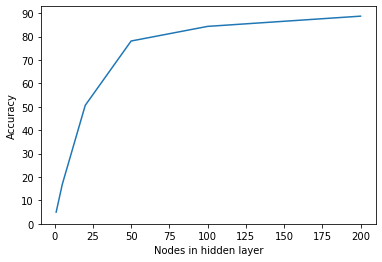

In [34]:
print("Plotting accuracy vs dimensionality of hidden layers")    
plt.plot(hidden_layer_dimensions, acc_val)
plt.xlabel('Nodes in hidden layer')
plt.ylabel('Accuracy')

plt.yticks(np.arange(0, 100, 10.0))

plt.show()